In [12]:
# Imports
from pathlib import Path
import re
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
from shutil import copy

# Slide analysis report 2

## Extract filenames

(Link to useful docs or relavant information)

In [13]:
def get_filenames(path):
    filenames = list(Path(path).glob('*.tif'))
    #filenames = [x.stem for x in filenames]
    return filenames

filenames = get_filenames('../../data/raw/raw')
len(filenames), filenames[0:5]

(275,
 [PosixPath('../../data/raw/raw/ExPW021_PW162-A05_Scan1_[9771,56981]_component_data.tif'),
  PosixPath('../../data/raw/raw/ExPW021_PW162-A05_Scan1_[8667,34630]_component_data.tif'),
  PosixPath('../../data/raw/raw/ExPW021_PW162-A05_Scan1_[16897,35336]_component_data.tif'),
  PosixPath('../../data/raw/raw/ExPW021_PW162-A05_Scan1_[11625,58370]_component_data.tif'),
  PosixPath('../../data/raw/raw/ExPW021_PW162-A05_Scan1_[15970,32557]_component_data.tif')])

## Extract coordinates

(Link to useful docs or relavant information)

In [14]:
def extract_coordinate_re(filename):
    coord_str = re.findall(r'\[(.*?)\]', str(filename))
    coord_split = coord_str[0].split(',')
    coord_int = np.array([int(coord_split[0]), int(coord_split[1])]) 
    return coord_int


## Batch Processing: Run on all Items


In [15]:
#alternative using re
coordinates_re = {}

for filename in filenames:
    #print(type(filename))
    coord = extract_coordinate_re(filename)
    coordinates_re[filename] = coord
#coordinates_re = np.array(coordinates_re)
#coordinates_re

### Visualizations, using scatter

In [16]:
#fig, ax = plt.subplots()
#ax.scatter(coordinates_re[:,0], coordinates_re[:,1])
#plt.axis('scaled')
#plt.show()

In [17]:
df = pd.DataFrame(data=coordinates_re).transpose()
df.columns = ['X', 'Y']
df

,X,Y
"../../data/raw/raw/ExPW021_PW162-A05_Scan1_[9771,56981]_component_data.tif",9771,56981
"../../data/raw/raw/ExPW021_PW162-A05_Scan1_[8667,34630]_component_data.tif",8667,34630
"../../data/raw/raw/ExPW021_PW162-A05_Scan1_[16897,35336]_component_data.tif",16897,35336
"../../data/raw/raw/ExPW021_PW162-A05_Scan1_[11625,58370]_component_data.tif",11625,58370
"../../data/raw/raw/ExPW021_PW162-A05_Scan1_[15970,32557]_component_data.tif",15970,32557
...,...,...
"../../data/raw/raw/ExPW021_PW162-A05_Scan1_[17824,32557]_component_data.tif",17824,32557
"../../data/raw/raw/ExPW021_PW162-A05_Scan1_[13478,58370]_component_data.tif",13478,58370
"../../data/raw/raw/ExPW021_PW162-A05_Scan1_[11447,36715]_component_data.tif",11447,36715
"../../data/raw/raw/ExPW021_PW162-A05_Scan1_[12129,41397]_component_data.tif",12129,41397


In [18]:
df['Kmeans'] = KMeans(n_clusters=4).fit_predict(df)
df

,X,Y,Kmeans
"../../data/raw/raw/ExPW021_PW162-A05_Scan1_[9771,56981]_component_data.tif",9771,56981,2
"../../data/raw/raw/ExPW021_PW162-A05_Scan1_[8667,34630]_component_data.tif",8667,34630,3
"../../data/raw/raw/ExPW021_PW162-A05_Scan1_[16897,35336]_component_data.tif",16897,35336,1
"../../data/raw/raw/ExPW021_PW162-A05_Scan1_[11625,58370]_component_data.tif",11625,58370,2
"../../data/raw/raw/ExPW021_PW162-A05_Scan1_[15970,32557]_component_data.tif",15970,32557,1
...,...,...,...
"../../data/raw/raw/ExPW021_PW162-A05_Scan1_[17824,32557]_component_data.tif",17824,32557,1
"../../data/raw/raw/ExPW021_PW162-A05_Scan1_[13478,58370]_component_data.tif",13478,58370,2
"../../data/raw/raw/ExPW021_PW162-A05_Scan1_[11447,36715]_component_data.tif",11447,36715,3
"../../data/raw/raw/ExPW021_PW162-A05_Scan1_[12129,41397]_component_data.tif",12129,41397,0


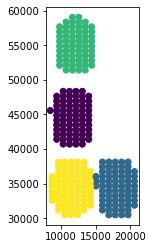

In [19]:
fig, ax = plt.subplots()
ax.scatter(df.X, df.Y, c=df.Kmeans)
plt.axis('scaled')
plt.show()

In [20]:
save_path = '../../data/processed/'
for filename, row in df.iterrows():
    new_path = save_path + str(row.Kmeans) + '/'
    name = filename.name
    copy(filename, str(new_path+name))

In [21]:
name

'ExPW021_PW162-A05_Scan1_[11447,38104]_component_data.tif'

## Observations, Notes, Conclusions